In [15]:
!pip install efficientnet

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os 
import tqdm
import glob
import tensorflow 

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import grey2rgb

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPooling2D, Conv2D, AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import efficientnet.keras as enet

# Data Augmentation

In [17]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2)

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255) 

In [18]:
train_dataset  = train_datagen.flow_from_directory(directory = 'Alzheimer_s Dataset/train',
                                                   target_size = (208,208),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   batch_size = 64)

Found 4098 images belonging to 4 classes.


In [19]:
valid_dataset = valid_datagen.flow_from_directory(directory = 'Alzheimer_s Dataset/train',
                                                  target_size = (208,208),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = 64)

Found 1023 images belonging to 4 classes.


100%|██████████| 5/5 [00:00<00:00,  6.49it/s]


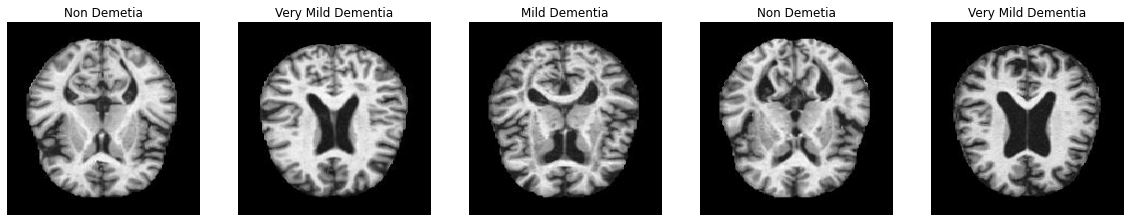

In [34]:
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize=(20,20))

for i in tqdm(range(0,5)):
    rand1 = np.random.randint(len(train_dataset))
    rand2 = np.random.randint(64)
    ax[i].imshow(train_dataset[rand1][0][rand2])
    ax[i].axis('off')
    a = train_dataset[rand1][1][rand2]
    if a[0] == 1:
        ax[i].set_title('Mild Dementia')
    elif a[1] == 1:
        ax[i].set_title('Moderate Dementia')
    elif a[2] == 1:
        ax[i].set_title('Non Demetia')
    elif a[3] == 1:
        ax[i].set_title('Very Mild Dementia')

In [ ]:
base_model = enet.EfficientNetB0(input_shape=(208,208,3), 
                                 include_top=False,
                                 weights="imagenet")

In [ ]:
for layer in base_model.layers:
    layer.trainable=False

In [ ]:
model=Sequential()
model.add(base_model)
model.add(AveragePooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()

In [ ]:
# Model Compile 

OPT    = tensorflow.keras.optimizers.SGD(lr=0.01)
METRIC = tensorflow.keras.metrics.AUC(name = 'auc')

model.compile(loss='categorical_crossentropy',
              metrics=METRIC,
              optimizer=OPT)

In [21]:
filepath = './model_tuning208_512_SGD1e2.h5'

checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'val_auc', 
                                mode='max', 
                                save_best_only=True, 
                                verbose = 1)


callback_list = [checkpoint]

In [22]:
model_history=model.fit(train_dataset,
                        validation_data=valid_dataset,
                        epochs = 100,
                         
                        callbacks = callback_list,
                        verbose = 1)

Epoch 1/100
65/65 [==============================] - ETA: 0s - loss: 1.4155 - auc: 0.7066
Epoch 00001: val_auc improved from -inf to 0.75580, saving model to .\model_tuning208_512_SGD1e2.h5
65/65 [==============================] - 256s 4s/step - loss: 1.4155 - auc: 0.7066 - val_loss: 1.1667 - val_auc: 0.7558
Epoch 2/100
65/65 [==============================] - ETA: 0s - loss: 1.1467 - auc: 0.7908
Epoch 00002: val_auc did not improve from 0.75580
65/65 [==============================] - 244s 4s/step - loss: 1.1467 - auc: 0.7908 - val_loss: 1.2261 - val_auc: 0.6779
Epoch 3/100
65/65 [==============================] - ETA: 0s - loss: 1.0935 - auc: 0.8052
Epoch 00003: val_auc did not improve from 0.75580
65/65 [==============================] - 245s 4s/step - loss: 1.0935 - auc: 0.8052 - val_loss: 1.1860 - val_auc: 0.6974
Epoch 4/100
65/65 [==============================] - ETA: 0s - loss: 1.0471 - auc: 0.8147
Epoch 00004: val_auc did not improve from 0.75580
65/65 [=======================

65/65 [==============================] - ETA: 0s - loss: 0.7470 - auc: 0.8987
Epoch 00031: val_auc did not improve from 0.77092
65/65 [==============================] - 144s 2s/step - loss: 0.7470 - auc: 0.8987 - val_loss: 1.0897 - val_auc: 0.7699
Epoch 32/100
65/65 [==============================] - ETA: 0s - loss: 0.7409 - auc: 0.8995
Epoch 00032: val_auc improved from 0.77092 to 0.77452, saving model to .\model_tuning208_512_SGD1e2.h5
65/65 [==============================] - 145s 2s/step - loss: 0.7409 - auc: 0.8995 - val_loss: 1.0784 - val_auc: 0.7745
Epoch 33/100
65/65 [==============================] - ETA: 0s - loss: 0.7335 - auc: 0.9024
Epoch 00033: val_auc did not improve from 0.77452
65/65 [==============================] - 143s 2s/step - loss: 0.7335 - auc: 0.9024 - val_loss: 1.0916 - val_auc: 0.7702
Epoch 34/100
65/65 [==============================] - ETA: 0s - loss: 0.7318 - auc: 0.9025
Epoch 00034: val_auc did not improve from 0.77452
65/65 [=============================

65/65 [==============================] - ETA: 0s - loss: 0.6320 - auc: 0.9277
Epoch 00061: val_auc did not improve from 0.79820
65/65 [==============================] - 237s 4s/step - loss: 0.6320 - auc: 0.9277 - val_loss: 1.0686 - val_auc: 0.7918
Epoch 62/100
65/65 [==============================] - ETA: 0s - loss: 0.6439 - auc: 0.9253
Epoch 00062: val_auc did not improve from 0.79820
65/65 [==============================] - 237s 4s/step - loss: 0.6439 - auc: 0.9253 - val_loss: 1.0557 - val_auc: 0.7971
Epoch 63/100
65/65 [==============================] - ETA: 0s - loss: 0.6183 - auc: 0.9306
Epoch 00063: val_auc did not improve from 0.79820
65/65 [==============================] - 236s 4s/step - loss: 0.6183 - auc: 0.9306 - val_loss: 1.0559 - val_auc: 0.7981
Epoch 64/100
65/65 [==============================] - ETA: 0s - loss: 0.6337 - auc: 0.9277
Epoch 00064: val_auc did not improve from 0.79820
65/65 [==============================] - 237s 4s/step - loss: 0.6337 - auc: 0.9277 - val_

65/65 [==============================] - 238s 4s/step - loss: 0.5743 - auc: 0.9405 - val_loss: 0.9797 - val_auc: 0.8289
Epoch 92/100
65/65 [==============================] - ETA: 0s - loss: 0.5815 - auc: 0.9388
Epoch 00092: val_auc did not improve from 0.82888
65/65 [==============================] - 236s 4s/step - loss: 0.5815 - auc: 0.9388 - val_loss: 0.9860 - val_auc: 0.8260
Epoch 93/100
65/65 [==============================] - ETA: 0s - loss: 0.5814 - auc: 0.9391
Epoch 00093: val_auc did not improve from 0.82888
65/65 [==============================] - 237s 4s/step - loss: 0.5814 - auc: 0.9391 - val_loss: 0.9838 - val_auc: 0.8267
Epoch 94/100
65/65 [==============================] - ETA: 0s - loss: 0.5557 - auc: 0.9442
Epoch 00094: val_auc did not improve from 0.82888
65/65 [==============================] - 236s 4s/step - loss: 0.5557 - auc: 0.9442 - val_loss: 1.0102 - val_auc: 0.8198
Epoch 95/100
65/65 [==============================] - ETA: 0s - loss: 0.5747 - auc: 0.9407
Epoch 

In [23]:
  base_model.summary()

Model: "efficientnet-b0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 208, 208, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 104, 104, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 104, 104, 32) 128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 104, 104, 32) 0           stem_bn[0][0]                    
____________________________________________________________________________________

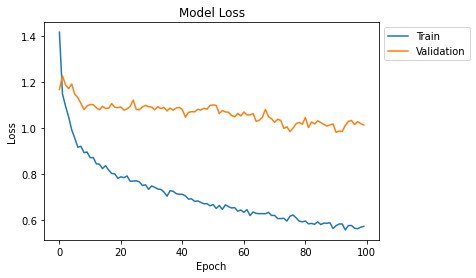

In [24]:
# Summarize history for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

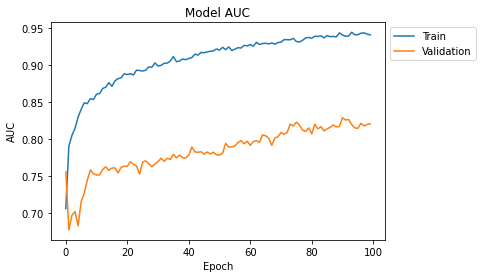

In [25]:
# Summarize history for loss

plt.plot(model_history.history['auc'])
plt.plot(model_history.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

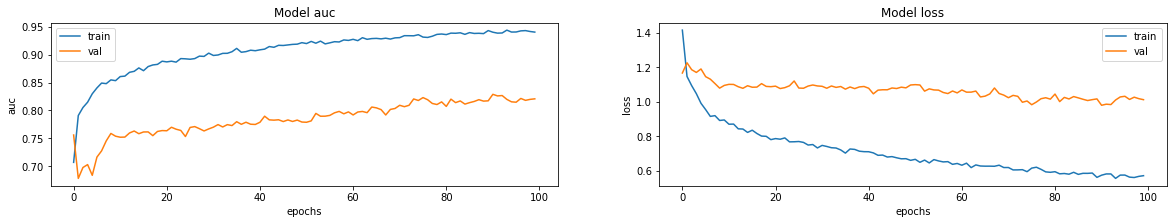

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['auc', 'loss']):
    ax[i].plot(model_history.history[met])
    ax[i].plot(model_history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [28]:
# Test Data 

test_dataset  = test_datagen.flow_from_directory(directory = 'Alzheimer_s Dataset/test',
                                                 target_size = (208,208),
                                                 class_mode = 'categorical',
                                                 batch_size = 64)

Found 1279 images belonging to 4 classes.


In [29]:
model.evaluate(test_dataset)

20/20 [==============================] - 34s 2s/step - loss: 0.7290 - auc: 0.9061


[0.7290375232696533, 0.9061260223388672]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Instructions for updating:
Please use `model.predict()` instead.
51.14 % chances are there that the image is NonDemented


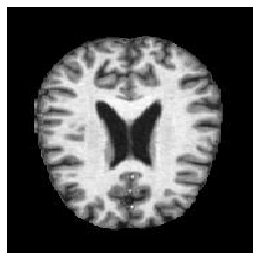

In [30]:
# Test Case 1: Non-Dementia

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('Alzheimer_s Dataset/test/NonDemented/26 (100).jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
answer = model.predict_classes(img)
probability = round(np.max(model.predict_proba(img)*100),2)

print(probability, '% chances are there that the image is',idc[answer[0]])

84.37 % chances are there that the image is MildDemented


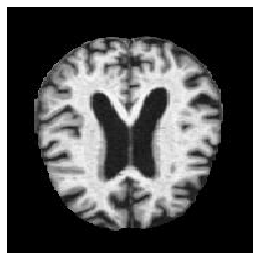

In [31]:
# Test Case 2: Mild Demented

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('Alzheimer_s Dataset/test/MildDemented/26 (19).jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
answer = model.predict_classes(img)
probability = round(np.max(model.predict_proba(img)*100),2)

print(probability, '% chances are there that the image is',idc[answer[0]])

77.41 % chances are there that the image is ModerateDemented


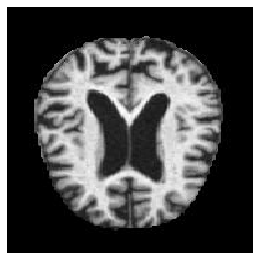

In [32]:
# Test Case 3: Moderate Demented

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('Alzheimer_s Dataset/test/ModerateDemented/27 (2).jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
answer = model.predict_classes(img)
probability = round(np.max(model.predict_proba(img)*100),2)

print(probability, '% chances are there that the image is',idc[answer[0]])

52.0 % chances are there that the image is VeryMildDemented


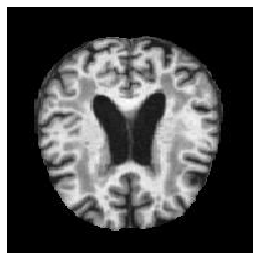

In [33]:
# Test Case 4: Very Mild Demented

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('Alzheimer_s Dataset/test/VeryMildDemented/26 (55).jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
answer = model.predict_classes(img)
probability = round(np.max(model.predict_proba(img)*100),2)

print(probability, '% chances are there that the image is',idc[answer[0]])